# Load dataframe

In [2]:
import pandas as pd
import numpy as np

# Load dataframe
df = pd.read_csv("path_to_2_stages_df.csv")


# Correlation analysis

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Extract features excluding the label column
features = df.drop(columns=['2_stages']) 

# Create an imputer object with a mean filling strategy
imputer = SimpleImputer(strategy='mean')
features_imputed = imputer.fit_transform(features)
features_imputed = pd.DataFrame(features_imputed, columns=features.columns)

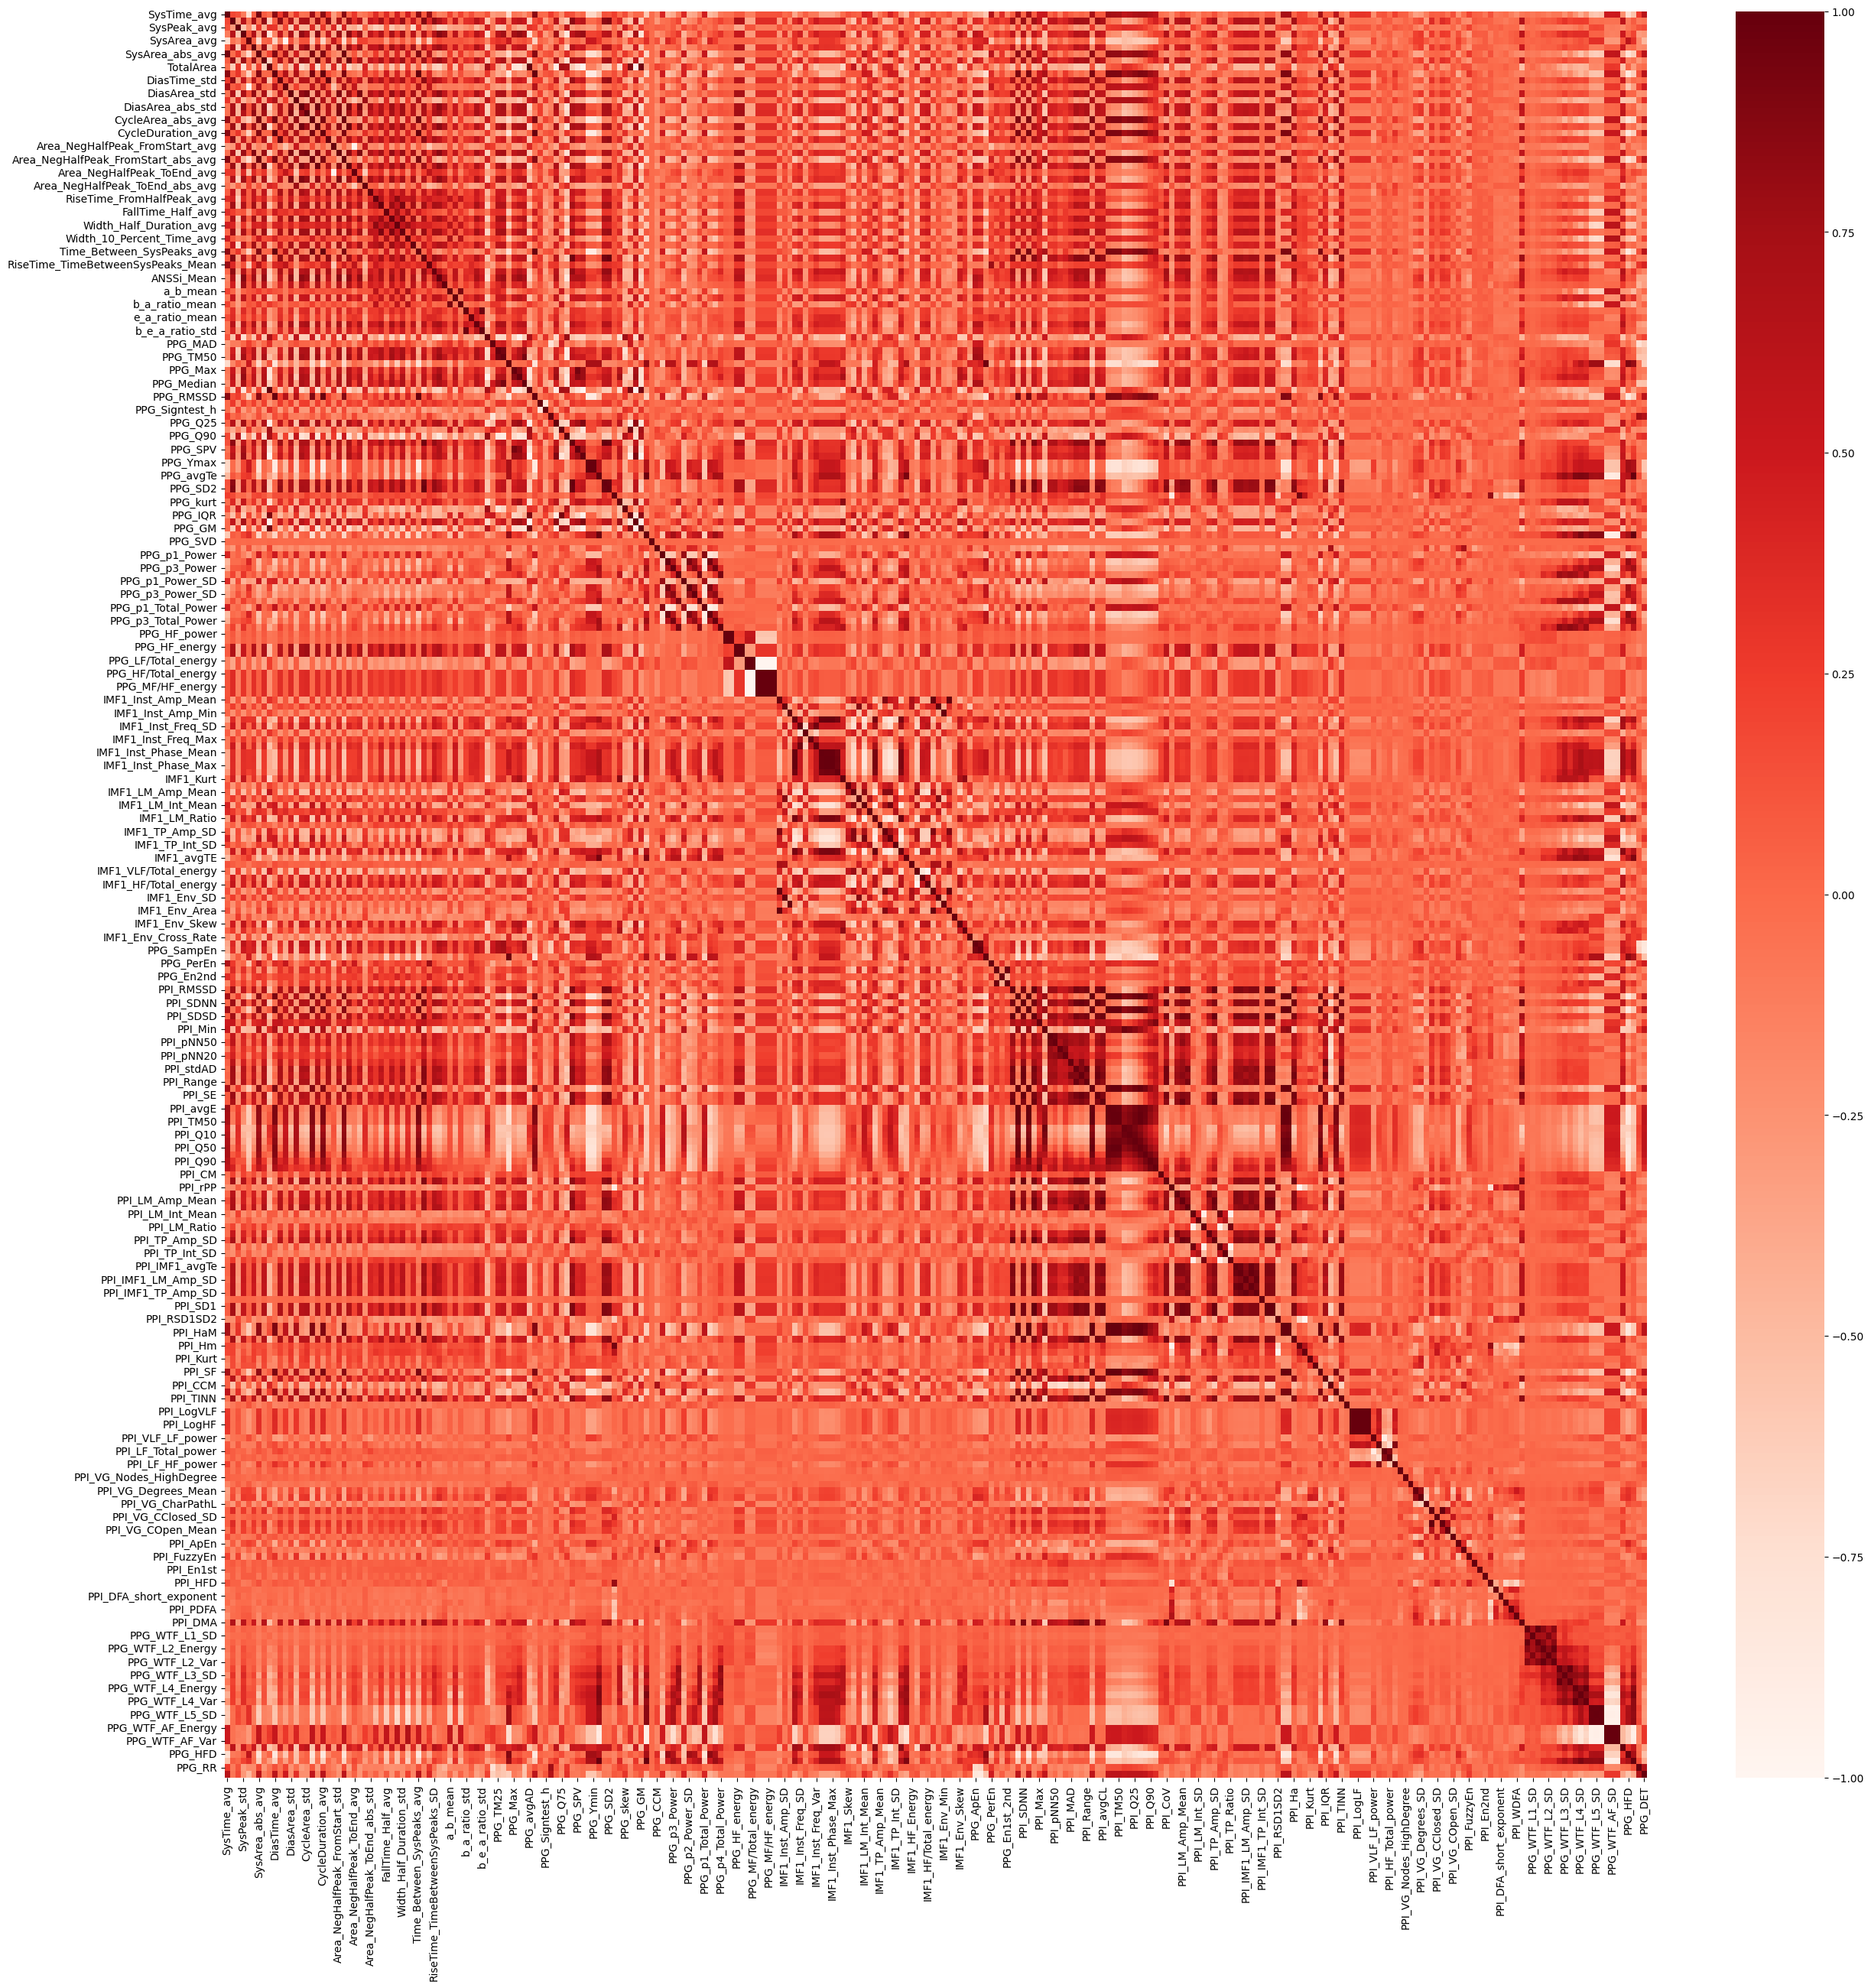

In [5]:
# Plot the heatmap
cor = features_imputed.corr()
plt.figure(figsize=(30,30))
sns.heatmap(cor, annot=False, cmap=plt.cm.Reds)
plt.show()


In [6]:
# Select upper triangle of correlation matrix
upper_tri = cor.where(np.triu(np.ones(cor.shape), k=1).astype(np.bool_))

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.95)]

print("Columns to drop due to high correlation:", to_drop)


Columns to drop due to high correlation: ['CycleArea_abs_std', 'CycleDuration_avg', 'CycleDuration_std', 'Area_NegHalfPeak_FromStart_abs_avg', 'Area_NegHalfPeak_FromStart_abs_std', 'Time_Between_SysPeaks_avg', 'b_e_a_ratio_std', 'PPG_avgAD', 'PPG_RMSSD', 'PPG_Ymin', 'PPG_SD1', 'PPG_SD2', 'PPG_Hm', 'PPG_Total_power2', 'PPG_Total_energy', 'PPG_MF/Total_energy', 'PPG_LF/HF_energy', 'PPG_MF/HF_energy', 'PPG_LF/MF_energy', 'IMF1_Inst_Freq_Var', 'IMF1_Inst_Phase_Mean', 'IMF1_Inst_Phase_SD', 'IMF1_Inst_Phase_Max', 'IMF1_Inst_Phase_Var', 'IMF1_TP_Ratio', 'IMF1_Env_Mean', 'IMF1_Env_SD', 'IMF1_Env_Min', 'IMF1_Env_Area', 'PPG_FuzzyEn', 'PPG_En1st_2nd', 'PPI_Mean', 'PPI_SDSD', 'PPI_pNN50', 'PPI_stdAD', 'PPI_avgAD', 'PPI_Range', 'PPI_Median', 'PPI_SE', 'PPI_avgCL', 'PPI_avgE', 'PPI_TM25', 'PPI_TM50', 'PPI_Q5', 'PPI_Q10', 'PPI_Q25', 'PPI_Q50', 'PPI_Q75', 'PPI_CoV', 'PPI_LM_Amp_Mean', 'PPI_TP_Amp_SD', 'PPI_TP_Int_Mean', 'PPI_IMF1_LM_Amp_Mean', 'PPI_IMF1_TP_Amp_Mean', 'PPI_IMF1_TP_Amp_SD', 'PPI_SD1', 

In [7]:
# Drop these columns from the DataFrame
df_revised = df.drop(columns=to_drop)

In [8]:
# Check NaNs

#df_revised = df
nan_columns = df_revised.columns[df_revised.isna().any()].tolist()

print("Columns with NaN values:")
print(nan_columns)

nan_counts = df_revised.isna().sum()
print("Number of NaN values in each column:")
print(nan_counts[nan_counts > 0])

# Calculate the threshold for 20% of the total number of rows
threshold = 0.02 * len(df_revised)

# Filter columns where the number of NaN values exceeds the threshold
nan_columns_2percent = nan_counts[nan_counts >= threshold]

# Print the columns with NaN values exceeding the threshold
print("Columns with NaN values exceeding 2% of the total data:")
print(nan_columns_2percent)


Columns with NaN values:
['a_b_mean', 'a_b_std', 'b_a_ratio_mean', 'b_a_ratio_std', 'e_a_ratio_mean', 'e_a_ratio_std', 'PPI_RMSSD', 'PPI_RMS', 'PPI_SDNN', 'PPI_Max', 'PPI_Min', 'PPI_NN50', 'PPI_NN20', 'PPI_pNN20', 'PPI_MAD', 'PPI_Q90', 'PPI_Q95', 'PPI_CM', 'PPI_rPP', 'PPI_avgTe', 'PPI_LM_Amp_SD', 'PPI_LM_Int_Mean', 'PPI_LM_Int_SD', 'PPI_LM_Ratio', 'PPI_TP_Amp_Mean', 'PPI_TP_Int_SD', 'PPI_TP_Ratio', 'PPI_IMF1_avgTe', 'PPI_IMF1_LM_Amp_SD', 'PPI_IMF1_TP_Int_SD', 'PPI_RSD1SD2', 'PPI_Ha', 'PPI_Hm', 'PPI_Hc', 'PPI_Kurt', 'PPI_Skew', 'PPI_IQR', 'PPI_CCM', 'PPI_SVD', 'PPI_Triangular_Index', 'PPI_LogVLF', 'PPI_VLF_LF_power', 'PPI_VLF_HF_power', 'PPI_LF_Total_power', 'PPI_HF_Total_power', 'PPI_LF_HF_power', 'PPI_VG_Nodes_SmallDegree', 'PPI_VG_Nodes_HighDegree', 'PPI_VG_Slope_PowerLawFit', 'PPI_VG_Degrees_Mean', 'PPI_VG_Degrees_SD', 'PPI_VG_CharPathL', 'PPI_VG_CClosed_Mean', 'PPI_VG_CClosed_SD', 'PPI_VG_COpen_Mean', 'PPI_VG_COpen_SD', 'PPI_ApEn', 'PPI_SampEn', 'PPI_FuzzyEn', 'PPI_PerEn', 'PPI_En1

In [9]:
# Drop columns where more than 2% of data is NaNs
columns_to_drop = ['PPI_VG_Slope_PowerLawFit', 'PPI_VG_COpen_Mean', 'PPI_VG_COpen_SD']

# Drop the specified columns from the DataFrame
df_revised = df_revised.drop(columns=columns_to_drop)


# Prepare X and y

In [ ]:
# Load subjects
df_subjects = pd.read_csv("path_to_subjects_df.csv") #NB! The subjects df has to have as many rows as 2_stages df

# Merge
df_revised = df_revised.copy()
df_revised['SubjectID'] = df_subjects['SubjectID']

# Assuming you've already done data preparation up to scaling
# Drop the '2_stages' and 'Subject' columns to get the features
X = df_revised.drop(['2_stages', 'SubjectID'], axis=1) #'PPI_GM', 'PPG_Hc', 'PPI_Signtest_h', 'PPI_Normalitytest_p', 'PPI_peakVLF'

# Convert labels and subjects for later use
y = df_revised['2_stages']
groups = df_revised['SubjectID']

# Feature Selection

In [54]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

sfm = SelectFromModel(estimator=RandomForestClassifier(n_estimators=100, random_state=42))
sfm.fit(X, y)

# Get the boolean mask indicating which features are selected
selected_features_mask = sfm.get_support()

# Get the names of the selected features from the original DataFrame
selected_features = X.columns[selected_features_mask]

print("Selected features:", selected_features)


Selected features: Index(['SysTime_avg', 'SysPeak_avg', 'SysArea_avg', 'SysArea_std', 'TotalArea',
       'DiasTime_avg', 'DiasArea_avg', 'DiasArea_abs_avg', 'CycleArea_std',
       'CycleArea_abs_avg', 'Area_NegHalfPeak_FromStart_avg',
       'Area_NegHalfPeak_FromStart_std', 'Area_NegHalfPeak_ToEnd_avg',
       'Area_NegHalfPeak_ToEnd_abs_avg', 'RiseTime_FromHalfPeak_avg',
       'RiseTime_FromHalfPeak_std', 'FallTime_Half_avg', 'FallTime_Half_std',
       'Width_Half_Duration_avg', 'Width_Half_Duration_std',
       'Width_10_Percent_Time_avg', 'Width_10_Percent_Time_std',
       'RiseTime_TimeBetweenSysPeaks_Mean', 'RiseTime_TimeBetweenSysPeaks_SD',
       'a_b_mean', 'a_b_std', 'b_a_ratio_mean', 'b_a_ratio_std',
       'e_a_ratio_mean', 'e_a_ratio_std', 'PPG_Min', 'PPG_MAD', 'PPG_TM25',
       'PPG_TM50', 'PPG_Median', 'PPG_Q10', 'PPG_Q25', 'PPG_Q75', 'PPG_stdAD',
       'PPG_kurt', 'PPG_skew', 'PPG_IQR', 'PPG_SF', 'PPG_GM', 'PPG_p1_Power',
       'PPG_p4_Power', 'PPG_p1_Power_SD',

In [55]:
X_selected = X[selected_features]
X_selected

,SysTime_avg,SysPeak_avg,SysArea_avg,SysArea_std,TotalArea,DiasTime_avg,DiasArea_avg,DiasArea_abs_avg,CycleArea_std,CycleArea_abs_avg,...,PPI_Min,PPI_Q90,PPI_Skew,PPI_SVD,PPI_WDFA,PPG_WTF_L4_Energy,PPG_WTF_L4_SD,PPG_LC,PPG_HFD,PPG_DET
0,0.243075,2.051287,-1.285312,14.791261,20.185956,0.665483,1.261417,0.259398,14.887894,0.449604,...,554.6875,704.68750,4.046943,4342.028380,1.041127,73.786172,0.544357,56.679685,1.596500,0.916861
1,0.343277,1.927268,2.661957,17.248446,18.963432,0.897964,-2.347344,0.350208,33.482002,0.522684,...,546.8750,1050.78125,1.724040,4368.549933,1.191702,124.451367,0.706797,59.669821,1.481480,0.961463
2,0.274200,2.242864,0.956881,15.603188,22.063562,0.709604,-0.729983,0.321099,39.961905,0.529929,...,531.2500,750.00000,1.124599,4421.909507,0.566286,47.301892,0.435842,61.623213,1.512300,0.889709
3,0.437240,2.824896,-1.905432,15.568619,21.087311,0.984896,2.499454,0.399883,33.056040,0.711210,...,390.6250,1353.12500,0.958315,4108.364895,0.691065,357.419869,1.197743,62.408353,1.531390,0.864056
4,0.274282,2.913433,1.484555,19.700900,25.268359,0.757390,-1.118548,0.390905,21.932653,0.663696,...,648.4375,750.00000,3.470733,4159.743597,1.272573,51.561563,0.455048,56.876811,1.638568,0.853705
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85537,0.457332,2.894850,0.939364,7.744200,25.575405,1.111178,-2.118725,0.505092,7.310276,0.948724,...,734.3750,1376.56250,-0.045976,5372.898844,0.574621,12.749257,0.226207,50.156012,1.312859,0.944182
85538,0.418870,2.790856,3.364588,9.194997,25.140178,1.088942,-2.414546,0.519036,16.466332,0.940217,...,718.7500,1421.87500,0.010163,5381.247505,0.574901,14.531636,0.241577,51.241862,1.329070,0.943974
85539,0.418692,2.838916,3.748585,6.014400,25.719602,1.080729,-6.714564,0.518319,9.094319,0.934729,...,757.8125,1411.71875,0.293322,5680.321491,0.762822,13.286614,0.230992,49.838657,1.319159,0.951243
85540,0.412946,2.848124,2.600567,7.562719,25.362439,1.034877,-3.052372,0.472643,11.480526,0.878504,...,726.5625,1285.15625,0.567074,5149.800654,1.026078,13.945365,0.236626,50.857749,1.367742,0.934705


# Hyperparameter tuning

In [56]:
from sklearn.model_selection import train_test_split, GroupKFold, RandomizedSearchCV, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from scipy.stats import randint as sp_randint
from sklearn.metrics import make_scorer, matthews_corrcoef

# Split your data into a smaller subset for quick exploration
X_sample, _, y_sample, _, groups_sample, _ = train_test_split(X_selected, y, groups, test_size=0.5, random_state=42, stratify = y)

# Initialize the pipeline with the steps
pipeline_rf = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Define parameters for RandomizedSearchCV, ensuring they're prefixed according to the pipeline steps
param_dist_rf = {
    'classifier__n_estimators': sp_randint(100, 500),
    'classifier__max_depth': [None] + list(range(3, 20)),
    'classifier__min_samples_split': sp_randint(2, 11),
    'classifier__min_samples_leaf': sp_randint(1, 11),
    'classifier__max_features': [None, 'sqrt', 'log2'],
    'classifier__bootstrap': [True, False]
}

# Define the GroupKFold cross-validator
gkf = GroupKFold(n_splits=3)

# Define MCC as the scoring metric using make_scorer
mcc_scorer = make_scorer(matthews_corrcoef)

# Set up RandomizedSearchCV with the pipeline
random_search_rf = RandomizedSearchCV(
    estimator=pipeline_rf,  # Use the pipeline as the estimator
    param_distributions=param_dist_rf,
    n_iter=100,  # Adjust based on computational resources
    scoring=mcc_scorer,  # Choose an appropriate scoring method
    n_jobs=-1,  # Use all available cores
    cv=gkf.split(X_sample, y_sample, groups_sample),  # Ensure GroupKFold uses group information
    verbose=3,
    random_state=42,
)

# Fit RandomizedSearchCV
random_search_rf.fit(X_sample, y_sample)

# After fitting, output the best parameters and score
print("Best parameters found: ", random_search_rf.best_params_)
print("Best score: ", random_search_rf.best_score_)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best parameters found:  {'classifier__bootstrap': True, 'classifier__max_depth': 19, 'classifier__max_features': 'sqrt', 'classifier__min_samples_leaf': 2, 'classifier__min_samples_split': 3, 'classifier__n_estimators': 409}
Best score:  0.2513885061663603


In [58]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid based on the results of random search 
param_grid_rf = {
    'classifier__bootstrap': [True],
    'classifier__max_depth': [5, 20, 19],
    'classifier__max_features': ['sqrt'],
    'classifier__min_samples_leaf': [2, 4, 6],
    'classifier__min_samples_split': [2, 3, 4],
    'classifier__n_estimators': [350, 400, 500]
}

# Set up GridSearchCV with the pipeline
grid_search_rf = GridSearchCV(
    estimator=pipeline_rf,
    param_grid=param_grid_rf,
    scoring=mcc_scorer,
    n_jobs=-1,
    cv=gkf.split(X, y, groups=groups),
    verbose=3
)

# Fit GridSearchCV
grid_search_rf.fit(X, y)

# Output the best parameters and score from grid search
print("Best parameters found: ", grid_search_rf.best_params_)
print("Best score: ", grid_search_rf.best_score_)

Fitting 3 folds for each of 81 candidates, totalling 243 fits
Best parameters found:  {'classifier__bootstrap': True, 'classifier__max_depth': 19, 'classifier__max_features': 'sqrt', 'classifier__min_samples_leaf': 4, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 500}
Best score:  0.2520239526095804


# Model training

In [41]:
# Get class distribution
label_counts = y.value_counts()
print(label_counts)

1    69414
0    16128
Name: 2_stages, dtype: int64


## 5-fold CV

In [80]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, matthews_corrcoef
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix


# Define your classifier with the best parameters found
rf_classifier = RandomForestClassifier(
    bootstrap=True,
    max_depth=19,
    max_features='sqrt',
    min_samples_leaf=4,
    min_samples_split=2,
    n_estimators=500,
    random_state=42
)

# Create the pipeline
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('classifier', rf_classifier)
])

# Initialize GroupKFold
gkf = GroupKFold(n_splits=5)

# Collect the metrics for each fold
fold_metrics = {
    'Accuracy': [],
    'Sensitivity': [],
    'Specificity': [],
    'Precision': [],
    'F1 Score': [],
    'MCC': []
}

# Initialize the confusion matrix
final_confusion_matrix_5cv = np.zeros((2, 2), dtype=int)

# Loop through the folds in GroupKFold
for train_index, test_index in gkf.split(X_selected, y, groups=groups):
    X_train, X_test = X_selected.iloc[train_index], X_selected.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Fit the pipeline on the training set
    pipeline.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = pipeline.predict(X_test)

    # Calculate the confusion matrix for this fold
    fold_confusion_matrix = confusion_matrix(y_test, y_pred)
    
    # Update the final confusion matrix
    final_confusion_matrix_5cv += confusion_matrix(y_test, y_pred)

     # Unpack confusion matrix to calculate specificity
    TN, FP, FN, TP = fold_confusion_matrix.ravel()

    # Calculate metrics for the fold
    fold_accuracy = accuracy_score(y_test, y_pred)
    fold_sensitivity = recall_score(y_test, y_pred)
    fold_specificity = TN / (TN + FP) if (TN + FP) > 0 else 0
    fold_precision = precision_score(y_test, y_pred)
    fold_f1 = f1_score(y_test, y_pred)
    fold_mcc = matthews_corrcoef(y_test, y_pred)
    
    # Append metrics for the fold
    fold_metrics['Accuracy'].append(fold_accuracy)
    fold_metrics['Sensitivity'].append(fold_sensitivity)
    fold_metrics['Specificity'].append(fold_specificity)
    fold_metrics['Precision'].append(fold_precision)
    fold_metrics['F1 Score'].append(fold_f1)
    fold_metrics['MCC'].append(fold_mcc)

# Convert the metrics dictionary to a DataFrame
metrics_df_5cv = pd.DataFrame(fold_metrics)
# Calculate mean and standard deviation for the metrics
metrics_mean_5cv = metrics_df_5cv.mean()
metrics_std_5cv = metrics_df_5cv.std()

# Print out the mean and standard deviation for the metrics
print(metrics_mean_5cv)
print(metrics_std_5cv)

# Calculate overall metrics from the total confusion matrix
TN, FP, FN, TP = final_confusion_matrix_5cv.ravel()
overall_accuracy = (TP + TN) / (TP + FP + FN + TN)
overall_sensitivity = TP / (TP + FN)
overall_specificity = TN / (TN + FP)
overall_precision = TP / (TP + FP)
overall_f1 = 2 * (overall_precision * overall_sensitivity) / (overall_precision + overall_sensitivity)
overall_mcc = (TP * TN - FP * FN) / np.sqrt((TP + FP) * (TP + FN) * (TN + FP) * (TN + FN))

# Print the final confusion matrix and overall metrics
print('Final Confusion Matrix:\n', final_confusion_matrix_5cv)
print('Overall Accuracy:', overall_accuracy)
print('Overall Sensitivity (Recall):', overall_sensitivity)
print('Overall Specificity:', overall_specificity)
print('Overall Precision:', overall_precision)
print('Overall F1 Score:', overall_f1)
print('Overall MCC:', overall_mcc)

Accuracy       0.815514
Sensitivity    0.945732
Specificity    0.257045
Precision      0.846053
F1 Score       0.892456
MCC            0.280395
dtype: float64
Accuracy       0.011517
Sensitivity    0.034353
Specificity    0.079842
Precision      0.023833
F1 Score       0.009223
MCC            0.066228
dtype: float64
Final Confusion Matrix:
 [[ 4160 11968]
 [ 3821 65593]]
Overall Accuracy: 0.8154240022445115
Overall Sensitivity (Recall): 0.9449534676001959
Overall Specificity: 0.25793650793650796
Overall Precision: 0.8456956460076585
Overall F1 Score: 0.8925735669331519
Overall MCC: nan


C:\Users\kmarkov\AppData\Local\Temp\2\ipykernel_29844\2631701765.py:92: RuntimeWarning: overflow encountered in scalar multiply
  overall_mcc = (TP * TN - FP * FN) / np.sqrt((TP + FP) * (TP + FN) * (TN + FP) * (TN + FN))
C:\Users\kmarkov\AppData\Local\Temp\2\ipykernel_29844\2631701765.py:92: RuntimeWarning: invalid value encountered in sqrt
  overall_mcc = (TP * TN - FP * FN) / np.sqrt((TP + FP) * (TP + FN) * (TN + FP) * (TN + FN))


### Feature importances

Top 10 Most Important Features:
                      Feature  Importance
32                   PPG_TM25    0.025792
40                   PPG_skew    0.025525
64                    PPI_RMS    0.021698
68                    PPI_SVD    0.020302
7            DiasArea_abs_avg    0.019596
28             e_a_ratio_mean    0.018322
29              e_a_ratio_std    0.017972
65                    PPI_Min    0.017721
20  Width_10_Percent_Time_avg    0.017545
37                    PPG_Q75    0.016239
5                DiasTime_avg    0.016144
63                  PPG_En2nd    0.015927
62                  PPG_En1st    0.015169
26             b_a_ratio_mean    0.014966
27              b_a_ratio_std    0.014955
24                   a_b_mean    0.014870
66                    PPI_Q90    0.014680
50         PPG_p2_Total_Power    0.014557
72                     PPG_LC    0.014370
52         PPG_p4_Total_Power    0.014190


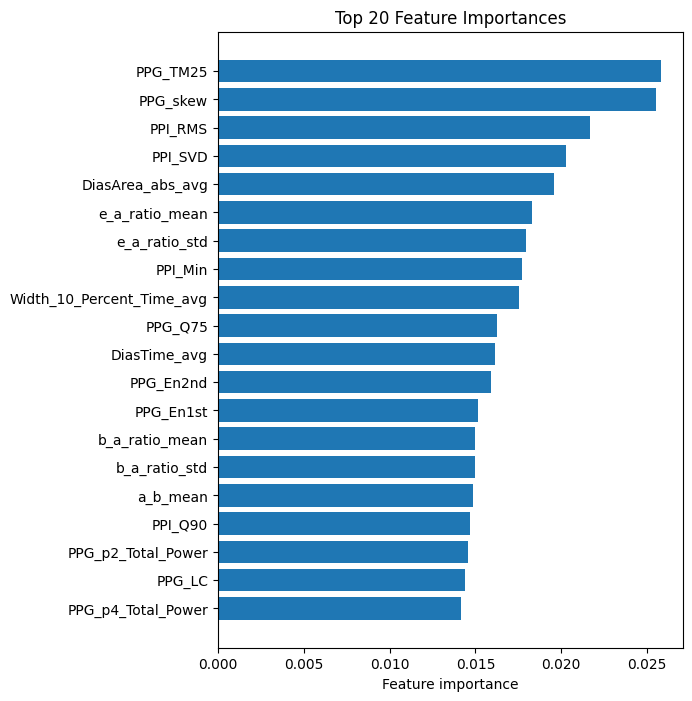

In [67]:
# Assuming 'pipeline' is already fitted and contains the RandomForestClassifier
rf_model = pipeline.named_steps['classifier']

# Get feature importances
feature_importances = rf_model.feature_importances_

# Create a DataFrame for easy visualization
# Assuming that 'X_train' has the same columns as 'X' used in cross-validation
importance_df_cv5 = pd.DataFrame({
    'Feature': X_selected.columns,
    'Importance': feature_importances
}).sort_values('Importance', ascending=False).head(20)  # Select only the top 20 features

# Print the top 20 most important features
print("top 20 Most Important Features:")
print(importance_df_cv5)

# Optional: plot the top 20 features for visual representation
plt.figure(figsize=(6, 8))
plt.barh(importance_df_cv5['Feature'], importance_df_cv5['Importance'])
plt.xlabel('Feature importance')
plt.title('Top 20 Feature Importances')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature on top
plt.show()

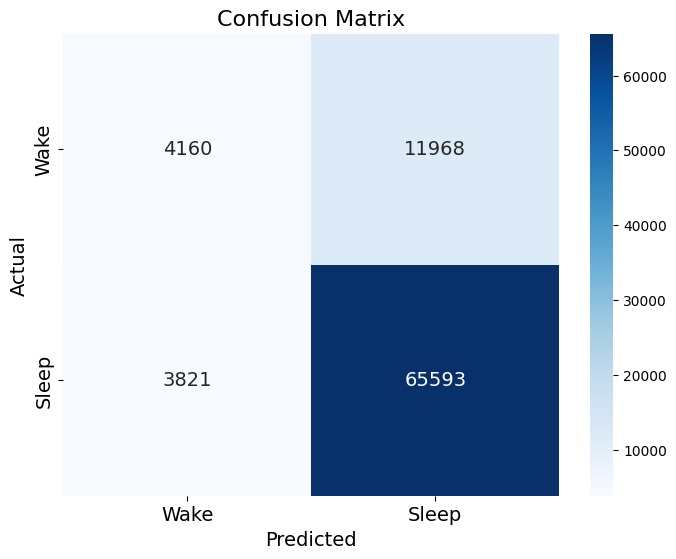

In [69]:
# Plot confusion matrix
cm = final_confusion_matrix_5cv
plt.figure(figsize=(8, 6))
font_size = 14
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Wake', 'Sleep'], yticklabels=['Wake', 'Sleep'], annot_kws={"size": font_size})
plt.ylabel('Actual', fontsize=font_size)
plt.xlabel('Predicted', fontsize=font_size)
plt.title('Confusion Matrix', fontsize=font_size+2)
plt.xticks(fontsize=font_size)
plt.yticks(fontsize=font_size)
plt.show()

## 10-fold CV

In [68]:
# Define your classifier with the best parameters found
rf_classifier = RandomForestClassifier(
    bootstrap=True,
    max_depth=19,
    max_features='sqrt',
    min_samples_leaf=4,
    min_samples_split=2,
    n_estimators=500,
    random_state=42
)

# Create the pipeline
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('classifier', rf_classifier)
])

# Initialize GroupKFold
gkf = GroupKFold(n_splits=10)

# Collect the metrics for each fold
fold_metrics = {
    'Accuracy': [],
    'Sensitivity': [],
    'Specificity': [],
    'Precision': [],
    'F1 Score': [],
    'MCC': []
}

# Initialize the confusion matrix
final_confusion_matrix_10cv = np.zeros((2, 2), dtype=int)

# Loop through the folds in GroupKFold
for train_index, test_index in gkf.split(X_selected, y, groups=groups):
    X_train, X_test = X_selected.iloc[train_index], X_selected.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Fit the pipeline on the training set
    pipeline.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = pipeline.predict(X_test)

    # Calculate the confusion matrix for this fold
    fold_confusion_matrix = confusion_matrix(y_test, y_pred)
    
    # Update the final confusion matrix
    final_confusion_matrix_10cv += confusion_matrix(y_test, y_pred)

     # Unpack confusion matrix to calculate specificity
    TN, FP, FN, TP = fold_confusion_matrix.ravel()

    # Calculate metrics for the fold
    fold_accuracy = accuracy_score(y_test, y_pred)
    fold_sensitivity = recall_score(y_test, y_pred)
    fold_specificity = TN / (TN + FP) if (TN + FP) > 0 else 0
    fold_precision = precision_score(y_test, y_pred)
    fold_f1 = f1_score(y_test, y_pred)
    fold_mcc = matthews_corrcoef(y_test, y_pred)
    
    # Append metrics for the fold
    fold_metrics['Accuracy'].append(fold_accuracy)
    fold_metrics['Sensitivity'].append(fold_sensitivity)
    fold_metrics['Specificity'].append(fold_specificity)
    fold_metrics['Precision'].append(fold_precision)
    fold_metrics['F1 Score'].append(fold_f1)
    fold_metrics['MCC'].append(fold_mcc)

# Convert the metrics dictionary to a DataFrame
metrics_df_10cv = pd.DataFrame(fold_metrics)
# Calculate mean and standard deviation for the metrics
metrics_mean_10cv = metrics_df_10cv.mean()
metrics_std_10cv = metrics_df_10cv.std()

# Print out the mean and standard deviation for the metrics
print(metrics_mean_10cv)
print(metrics_std_10cv)

# Calculate overall metrics from the total confusion matrix
TN, FP, FN, TP = final_confusion_matrix_10cv.ravel()
overall_accuracy = (TP + TN) / (TP + FP + FN + TN)
overall_sensitivity = TP / (TP + FN)
overall_specificity = TN / (TN + FP)
overall_precision = TP / (TP + FP)
overall_f1 = 2 * (overall_precision * overall_sensitivity) / (overall_precision + overall_sensitivity)
overall_mcc = (TP * TN - FP * FN) / np.sqrt((TP + FP) * (TP + FN) * (TN + FP) * (TN + FN))

# Print the final confusion matrix and overall metrics
print('Final Confusion Matrix:\n', final_confusion_matrix_10cv)
print('Overall Accuracy:', overall_accuracy)
print('Overall Sensitivity (Recall):', overall_sensitivity)
print('Overall Specificity:', overall_specificity)
print('Overall Precision:', overall_precision)
print('Overall F1 Score:', overall_f1)
print('Overall MCC:', overall_mcc)

Accuracy       0.814066
Sensitivity    0.948007
Specificity    0.237421
Precision      0.843174
F1 Score       0.891862
MCC            0.263604
dtype: float64
Accuracy       0.026050
Sensitivity    0.029443
Specificity    0.066113
Precision      0.030785
F1 Score       0.016721
MCC            0.106777
dtype: float64
Final Confusion Matrix:
 [[ 3870 12258]
 [ 3690 65724]]
Overall Accuracy: 0.8135652661850319
Overall Sensitivity (Recall): 0.9468406949606708
Overall Specificity: 0.23995535714285715
Overall Precision: 0.842809879202893
Overall F1 Score: 0.8918016771147114
Overall MCC: nan


C:\Users\kmarkov\AppData\Local\Temp\2\ipykernel_29844\4180555716.py:92: RuntimeWarning: overflow encountered in scalar multiply
  overall_mcc = (TP * TN - FP * FN) / np.sqrt((TP + FP) * (TP + FN) * (TN + FP) * (TN + FN))
C:\Users\kmarkov\AppData\Local\Temp\2\ipykernel_29844\4180555716.py:92: RuntimeWarning: invalid value encountered in sqrt
  overall_mcc = (TP * TN - FP * FN) / np.sqrt((TP + FP) * (TP + FN) * (TN + FP) * (TN + FN))


### Feature importances

Top 10 Most Important Features:
                      Feature  Importance
72                     PPG_LC    0.027843
40                   PPG_skew    0.025814
32                   PPG_TM25    0.024816
29              e_a_ratio_std    0.021674
64                    PPI_RMS    0.020135
68                    PPI_SVD    0.018891
20  Width_10_Percent_Time_avg    0.017815
63                  PPG_En2nd    0.017657
37                    PPG_Q75    0.017590
60                 PPG_SampEn    0.017502
5                DiasTime_avg    0.016857
7            DiasArea_abs_avg    0.016313
66                    PPI_Q90    0.016220
15  RiseTime_FromHalfPeak_std    0.016182
65                    PPI_Min    0.015990
28             e_a_ratio_mean    0.015952
52         PPG_p4_Total_Power    0.015294
41                    PPG_IQR    0.015084
24                   a_b_mean    0.014923
50         PPG_p2_Total_Power    0.014860


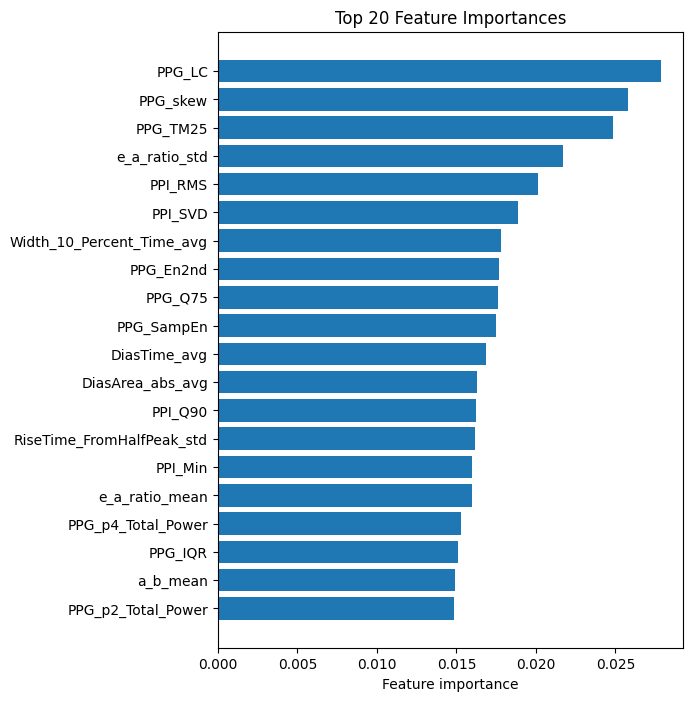

In [70]:
# Assuming 'pipeline' is already fitted and contains the RandomForestClassifier
rf_model = pipeline.named_steps['classifier']

# Get feature importances
feature_importances = rf_model.feature_importances_

# Create a DataFrame for easy visualization
# Assuming that 'X_train' has the same columns as 'X' used in cross-validation
importance_df_cv10 = pd.DataFrame({
    'Feature': X_selected.columns,
    'Importance': feature_importances
}).sort_values('Importance', ascending=False).head(20)  # Select only the top 20 features

# Print the top 20 most important features
print("top 20 Most Important Features:")
print(importance_df_cv10)

# Optional: plot the top 20 features for visual representation
plt.figure(figsize=(6, 8))
plt.barh(importance_df_cv10['Feature'], importance_df_cv10['Importance'])
plt.xlabel('Feature importance')
plt.title('Top 20 Feature Importances')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature on top
plt.show()

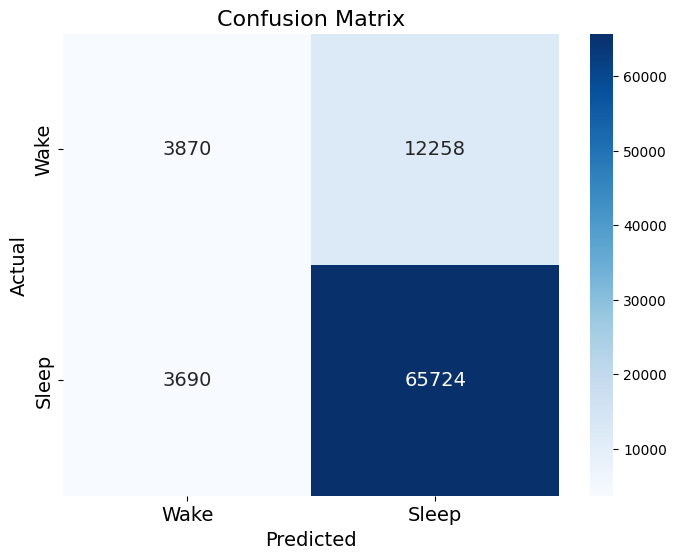

In [71]:
# Plot confusion matrix
cm = final_confusion_matrix_10cv
plt.figure(figsize=(8, 6))
font_size = 14
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Wake', 'Sleep'], yticklabels=['Wake', 'Sleep'], annot_kws={"size": font_size})
plt.ylabel('Actual', fontsize=font_size)
plt.xlabel('Predicted', fontsize=font_size)
plt.title('Confusion Matrix', fontsize=font_size+2)
plt.xticks(fontsize=font_size)
plt.yticks(fontsize=font_size)
plt.show()

## 20-fold CV

In [73]:
# Define your classifier with the best parameters found
rf_classifier = RandomForestClassifier(
    bootstrap=True,
    max_depth=19,
    max_features='sqrt',
    min_samples_leaf=4,
    min_samples_split=2,
    n_estimators=500,
    random_state=42
)

# Create the pipeline
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('classifier', rf_classifier)
])

# Initialize GroupKFold
gkf = GroupKFold(n_splits=20)

# Collect the metrics for each fold
fold_metrics = {
    'Accuracy': [],
    'Sensitivity': [],
    'Specificity': [],
    'Precision': [],
    'F1 Score': [],
    'MCC': []
}

# Initialize the confusion matrix
final_confusion_matrix_20cv = np.zeros((2, 2), dtype=int)

# Loop through the folds in GroupKFold
for train_index, test_index in gkf.split(X_selected, y, groups=groups):
    X_train, X_test = X_selected.iloc[train_index], X_selected.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Fit the pipeline on the training set
    pipeline.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = pipeline.predict(X_test)

    # Calculate the confusion matrix for this fold
    fold_confusion_matrix = confusion_matrix(y_test, y_pred)
    
    # Update the final confusion matrix
    final_confusion_matrix_20cv += confusion_matrix(y_test, y_pred)

     # Unpack confusion matrix to calculate specificity
    TN, FP, FN, TP = fold_confusion_matrix.ravel()

    # Calculate metrics for the fold
    fold_accuracy = accuracy_score(y_test, y_pred)
    fold_sensitivity = recall_score(y_test, y_pred)
    fold_specificity = TN / (TN + FP) if (TN + FP) > 0 else 0
    fold_precision = precision_score(y_test, y_pred)
    fold_f1 = f1_score(y_test, y_pred)
    fold_mcc = matthews_corrcoef(y_test, y_pred)
    
    # Append metrics for the fold
    fold_metrics['Accuracy'].append(fold_accuracy)
    fold_metrics['Sensitivity'].append(fold_sensitivity)
    fold_metrics['Specificity'].append(fold_specificity)
    fold_metrics['Precision'].append(fold_precision)
    fold_metrics['F1 Score'].append(fold_f1)
    fold_metrics['MCC'].append(fold_mcc)

# Convert the metrics dictionary to a DataFrame
metrics_df_20cv = pd.DataFrame(fold_metrics)
# Calculate mean and standard deviation for the metrics
metrics_mean_20cv = metrics_df_20cv.mean()
metrics_std_20cv = metrics_df_20cv.std()

# Print out the mean and standard deviation for the metrics
print(metrics_mean_20cv)
print(metrics_std_20cv)

# Calculate overall metrics from the total confusion matrix
TN, FP, FN, TP = final_confusion_matrix_10cv.ravel()
overall_accuracy = (TP + TN) / (TP + FP + FN + TN)
overall_sensitivity = TP / (TP + FN)
overall_specificity = TN / (TN + FP)
overall_precision = TP / (TP + FP)
overall_f1 = 2 * (overall_precision * overall_sensitivity) / (overall_precision + overall_sensitivity)
overall_mcc = (TP * TN - FP * FN) / np.sqrt((TP + FP) * (TP + FN) * (TN + FP) * (TN + FN))

# Print the final confusion matrix and overall metrics
print('Final Confusion Matrix:\n', final_confusion_matrix_10cv)
print('Overall Accuracy:', overall_accuracy)
print('Overall Sensitivity (Recall):', overall_sensitivity)
print('Overall Specificity:', overall_specificity)
print('Overall Precision:', overall_precision)
print('Overall F1 Score:', overall_f1)
print('Overall MCC:', overall_mcc)

Accuracy       0.812611
Sensitivity    0.945373
Specificity    0.221994
Precision      0.843494
F1 Score       0.889647
MCC            0.230862
dtype: float64
Accuracy       0.052196
Sensitivity    0.044549
Specificity    0.124601
Precision      0.059882
F1 Score       0.035540
MCC            0.134717
dtype: float64
Final Confusion Matrix:
 [[ 3870 12258]
 [ 3690 65724]]
Overall Accuracy: 0.8135652661850319
Overall Sensitivity (Recall): 0.9468406949606708
Overall Specificity: 0.23995535714285715
Overall Precision: 0.842809879202893
Overall F1 Score: 0.8918016771147114
Overall MCC: nan


C:\Users\kmarkov\AppData\Local\Temp\2\ipykernel_29844\4234061871.py:92: RuntimeWarning: overflow encountered in scalar multiply
  overall_mcc = (TP * TN - FP * FN) / np.sqrt((TP + FP) * (TP + FN) * (TN + FP) * (TN + FN))
C:\Users\kmarkov\AppData\Local\Temp\2\ipykernel_29844\4234061871.py:92: RuntimeWarning: invalid value encountered in sqrt
  overall_mcc = (TP * TN - FP * FN) / np.sqrt((TP + FP) * (TP + FN) * (TN + FP) * (TN + FN))


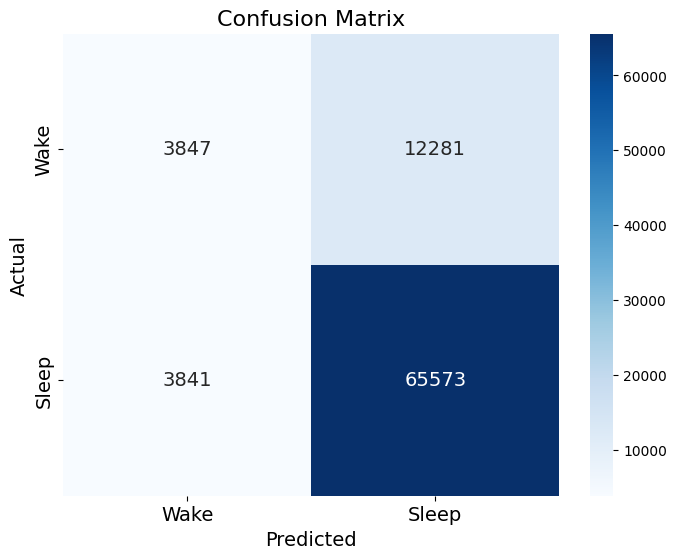

In [74]:
# Plot confusion matrix
cm = final_confusion_matrix_20cv
plt.figure(figsize=(8, 6))
font_size = 14
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Wake', 'Sleep'], yticklabels=['Wake', 'Sleep'], annot_kws={"size": font_size})
plt.ylabel('Actual', fontsize=font_size)
plt.xlabel('Predicted', fontsize=font_size)
plt.title('Confusion Matrix', fontsize=font_size+2)
plt.xticks(fontsize=font_size)
plt.yticks(fontsize=font_size)
plt.show()

### Feature importances

Top 10 Most Important Features:
                              Feature  Importance
72                             PPG_LC    0.025212
40                           PPG_skew    0.025061
29                      e_a_ratio_std    0.022561
32                           PPG_TM25    0.021804
64                            PPI_RMS    0.019188
7                    DiasArea_abs_avg    0.018507
63                          PPG_En2nd    0.018089
68                            PPI_SVD    0.018050
65                            PPI_Min    0.017500
20          Width_10_Percent_Time_avg    0.017164
28                     e_a_ratio_mean    0.017125
37                            PPG_Q75    0.016878
14          RiseTime_FromHalfPeak_avg    0.016308
15          RiseTime_FromHalfPeak_std    0.015852
5                        DiasTime_avg    0.015762
24                           a_b_mean    0.015467
22  RiseTime_TimeBetweenSysPeaks_Mean    0.015307
66                            PPI_Q90    0.014886
62                

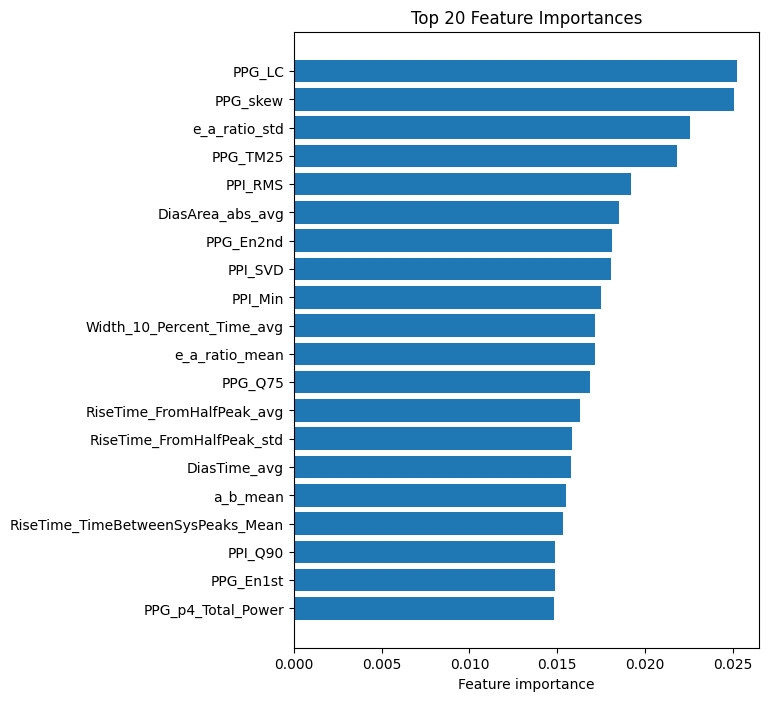

In [75]:
# Assuming 'pipeline' is already fitted and contains the RandomForestClassifier
rf_model = pipeline.named_steps['classifier']

# Get feature importances
feature_importances_cv20 = rf_model.feature_importances_

# Create a DataFrame for easy visualization
# Assuming that 'X_train' has the same columns as 'X' used in cross-validation
importance_df_cv20 = pd.DataFrame({
    'Feature': X_selected.columns,
    'Importance': feature_importances_cv20
}).sort_values('Importance', ascending=False).head(20)  # Select only the top 20 features

# Print the top 20 most important features
print("Top 20 Most Important Features:")
print(importance_df_cv20)

# Optional: plot the top 20 features for visual representation
plt.figure(figsize=(6, 8))
plt.barh(importance_df_cv20['Feature'], importance_df_cv20['Importance'])
plt.xlabel('Feature importance')
plt.title('Top 20 Feature Importances')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature on top
plt.show()

# Overall feature importance

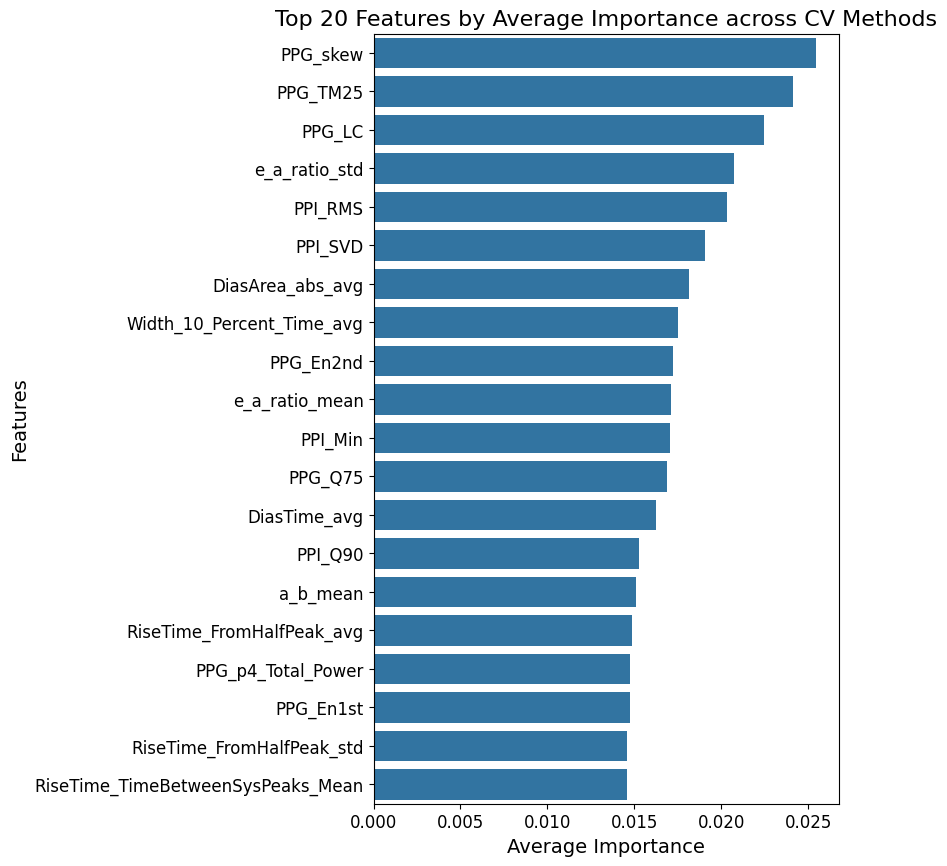

In [110]:
# Ensure DataFrames are aligned by features, assuming 'Feature' is the index or make it the index
importance_df_cv10.set_index('Feature', inplace=True)
importance_df_cv5.set_index('Feature', inplace=True)
importance_df_cv20.set_index('Feature', inplace=True)

# Check and order the indices if necessary
aligned_index = sorted(importance_df_cv10.index)  # Ensure all DataFrames have the same index in the same order
importance_df_10cv = importance_df_cv10.loc[aligned_index]
importance_df_5cv = importance_df_cv5.loc[aligned_index]
importance_df_20cv = importance_df_cv20.loc[aligned_index]

# Concatenate along axis=1 and calculate the mean importance across the three DataFrames
mean_importance_df = pd.concat([importance_df_10cv, importance_df_5cv, importance_df_20cv], axis=1).mean(axis=1)

# Reset the index to turn the features back into a column
mean_importance_df = mean_importance_df.reset_index().rename(columns={0: 'Importance', 'index': 'Feature'})

# Sort the DataFrame by importance and take the top 20 features
top_20_features = mean_importance_df.nlargest(20, 'Importance')

# Now, plot the barplot of the top 20 features
plt.figure(figsize=(6, 10))
barplot = sns.barplot(data=top_20_features, x='Importance', y='Feature')

# Adding plot details
plt.title('Top 20 Features by Average Importance across CV Methods', fontsize=16)
plt.xlabel('Average Importance', fontsize=14)
plt.ylabel('Features', fontsize=14)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)

# Show the plot
plt.show()


In [114]:
top_20_features

,Feature,Importance,class
48,PPG_skew,0.025467,0
34,PPG_TM25,0.024137,0
24,PPG_LC,0.022475,0
74,e_a_ratio_std,0.020736,1
52,PPI_RMS,0.020340,0
53,PPI_SVD,0.019081,1
6,DiasArea_abs_avg,0.018139,0
65,Width_10_Percent_Time_avg,0.017508,1
20,PPG_En2nd,0.017225,0
73,e_a_ratio_mean,0.017133,1


C:\Users\kmarkov\AppData\Local\Temp\2\ipykernel_30488\2917224694.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_selected_top_20['class'] = y # Add the class labels


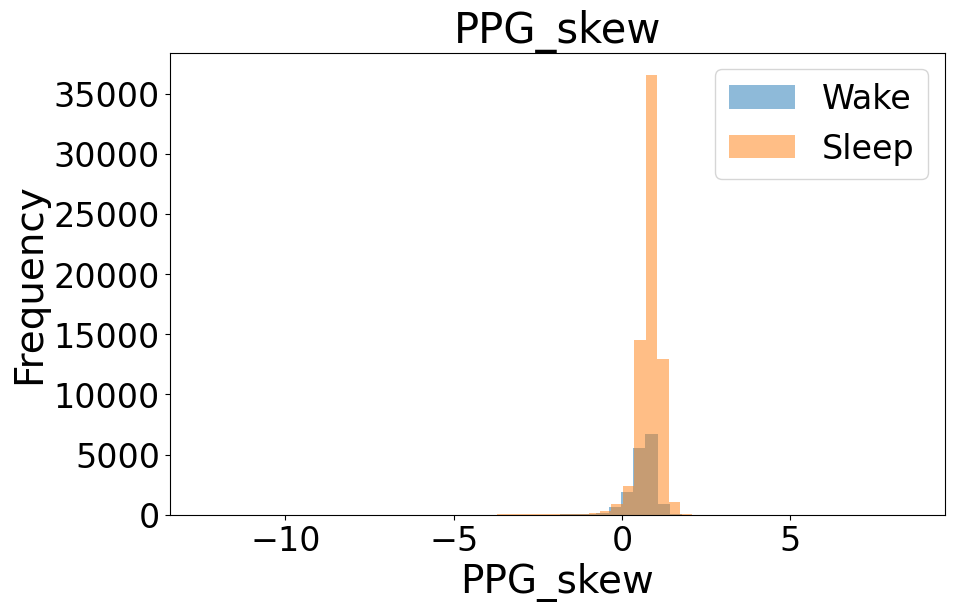

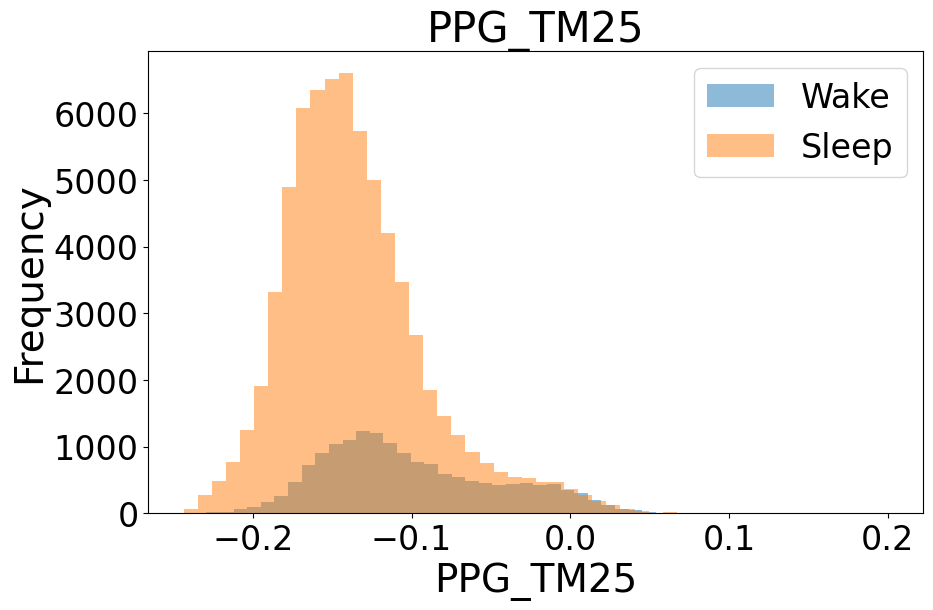

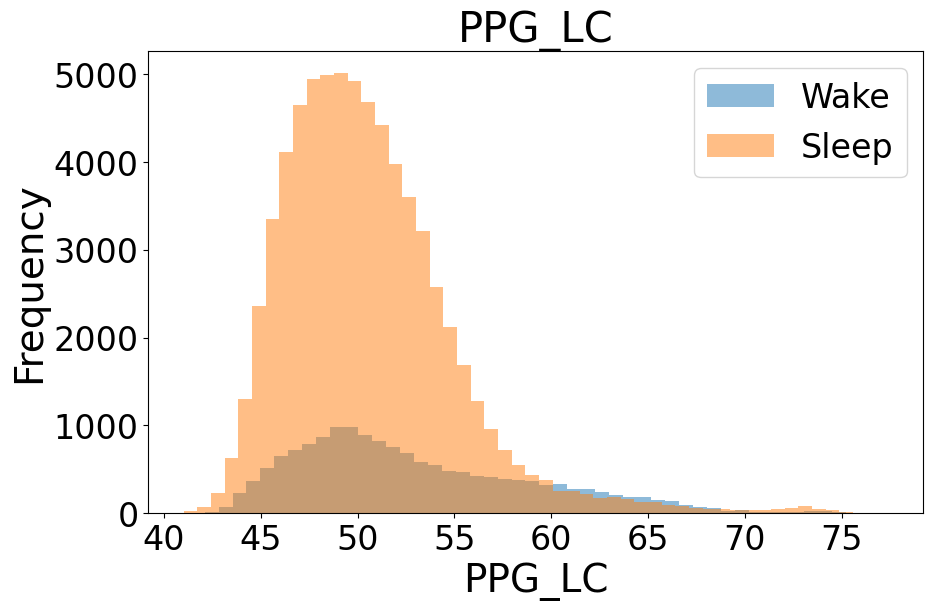

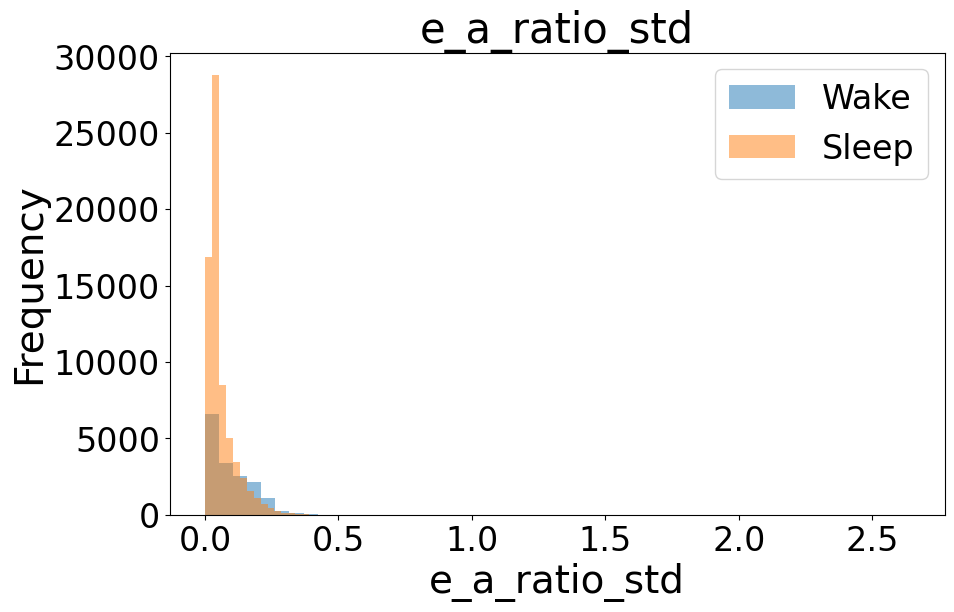

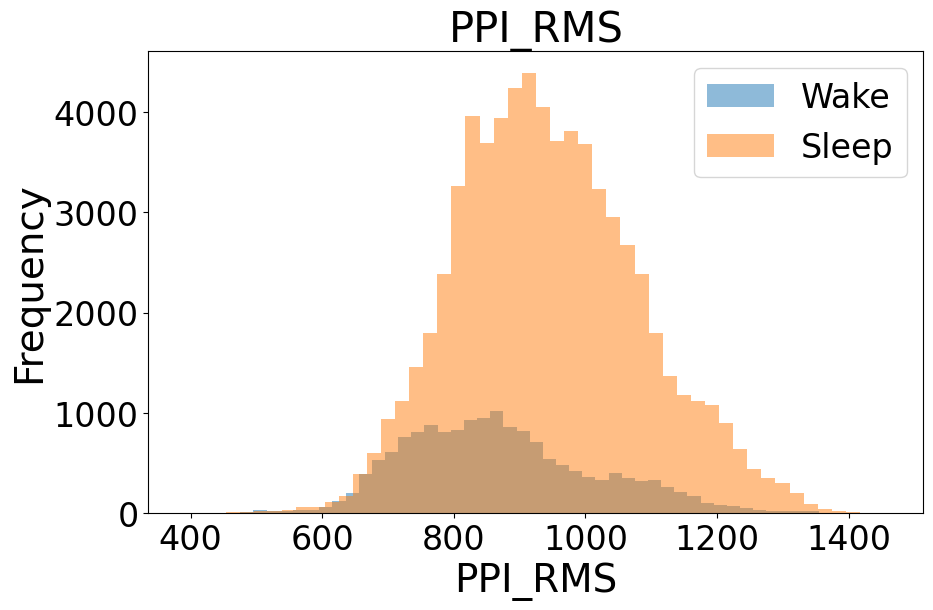

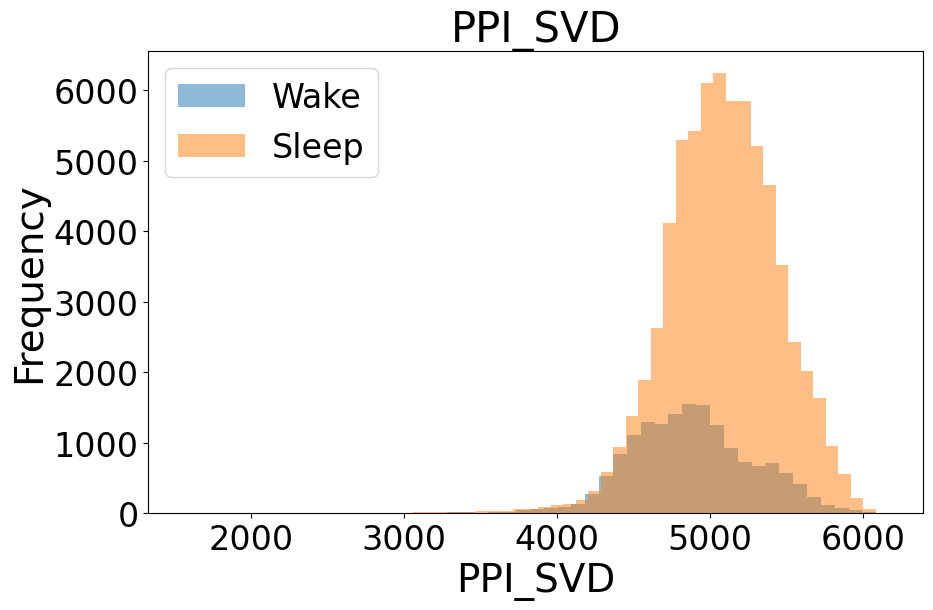

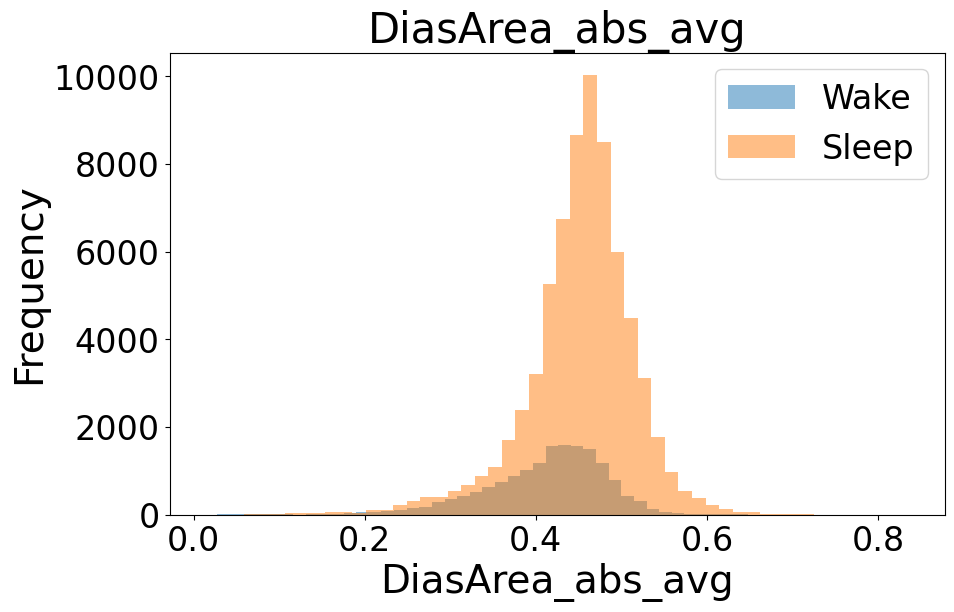

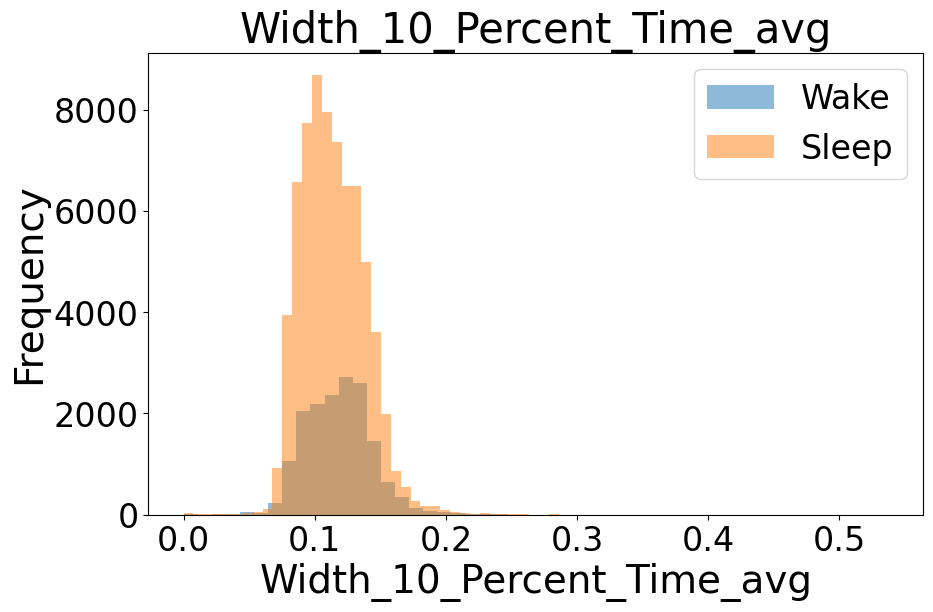

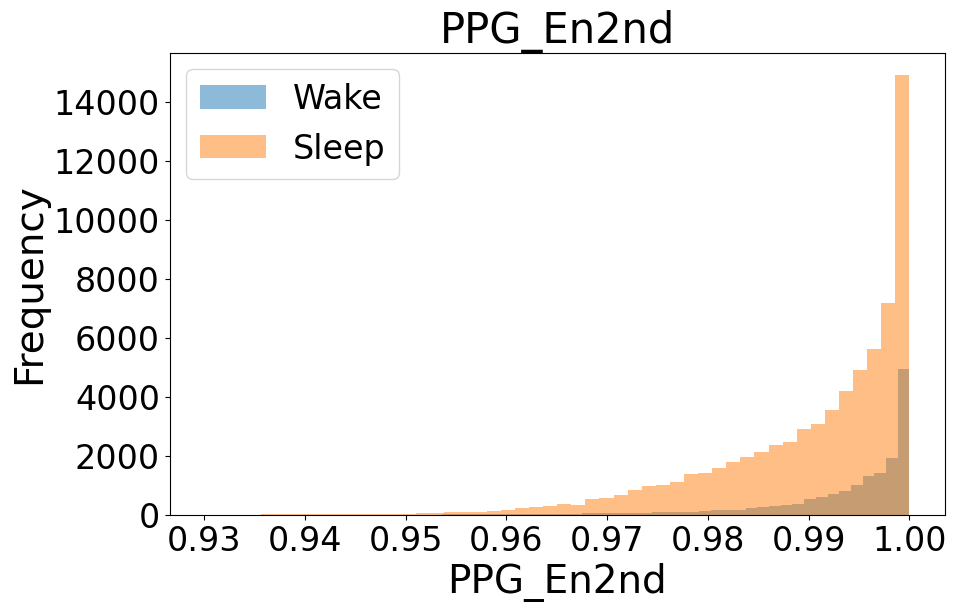

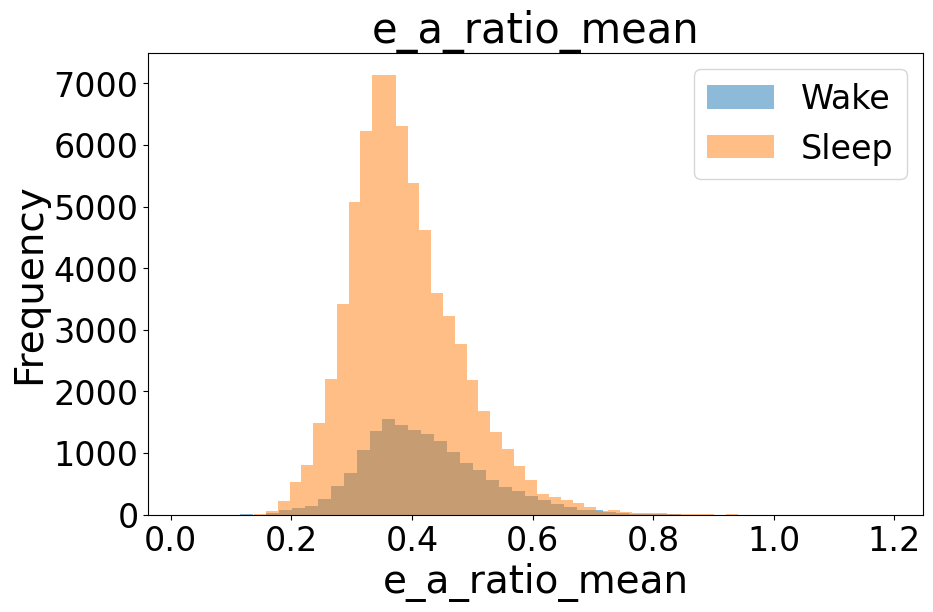

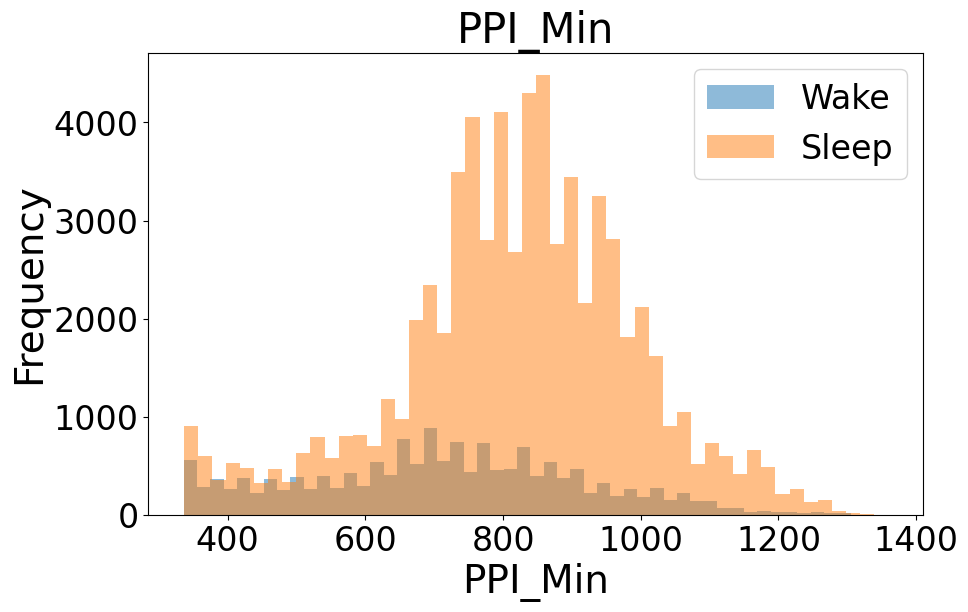

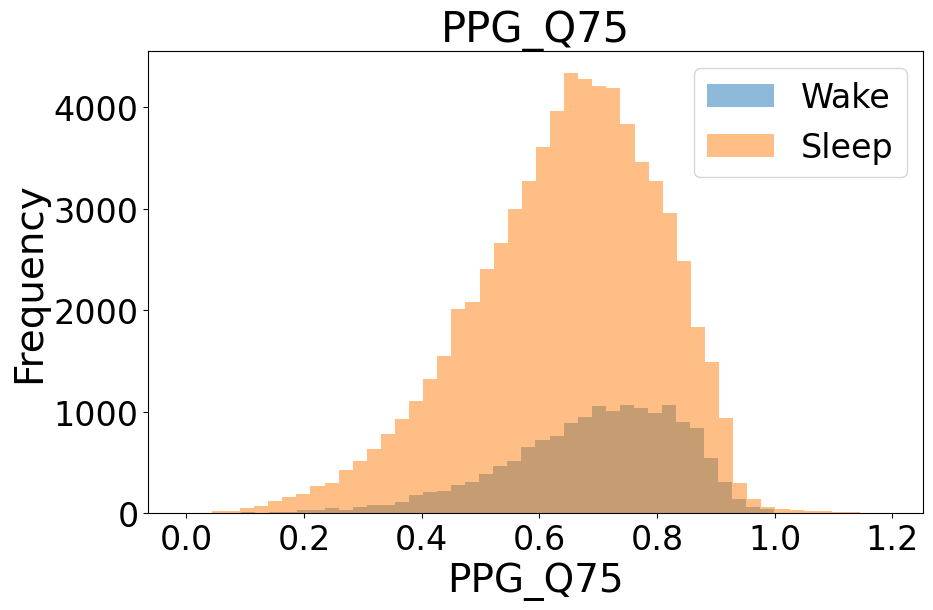

In [25]:
# Plot histograms for top-performing histograms

top_20_feature_names = top_20_features['Feature'].tolist()

# Define a dictionary to map class values to sleep stages
class_labels = {
    0: "Wake",
    1: "Sleep",
}

# Select top 20 features from X_selected
X_selected_top_20 = X_selected[top_20_feature_names]

# Plot histograms for each feature
X_selected_top_20['class'] = y # Add the class labels

feature_names = top_20_feature_names
for feature in feature_names:  # Exclude the 'class' column
    plt.figure(figsize=(10, 6))
    for class_value in np.unique(y):  # Handles any number of classes
        subset = X_selected_top_20[X_selected_top_20['class'] == class_value]
        plt.hist(subset[feature], bins=50, alpha=0.5, label=class_labels[class_value])
    plt.title(f'{feature}', fontsize = 30)
    plt.xlabel('Value', fontsize = 28)
    plt.ylabel('Frequency', fontsize = 28)
    plt.xticks (fontsize = 24)
    plt.yticks (fontsize = 24)
    plt.legend(fontsize = 24)
    plt.show()

C:\Users\kmarkov\AppData\Local\Temp\2\ipykernel_30488\853861826.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_selected_top_20['class'] = y
C:\Users\kmarkov\AppData\Local\Temp\2\ipykernel_30488\853861826.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_selected_top_20['class'] = X_selected_top_20['class'].map(class_mapping)


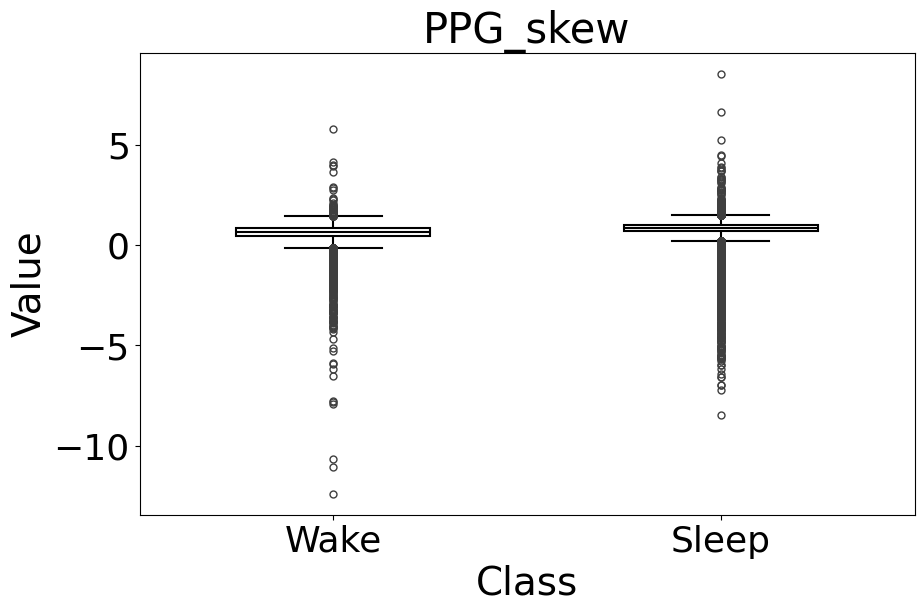

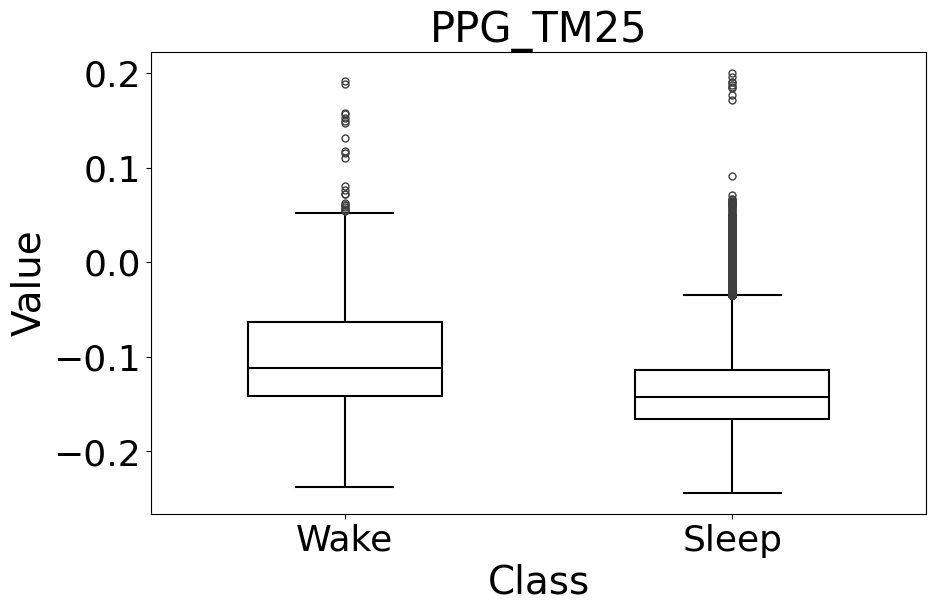

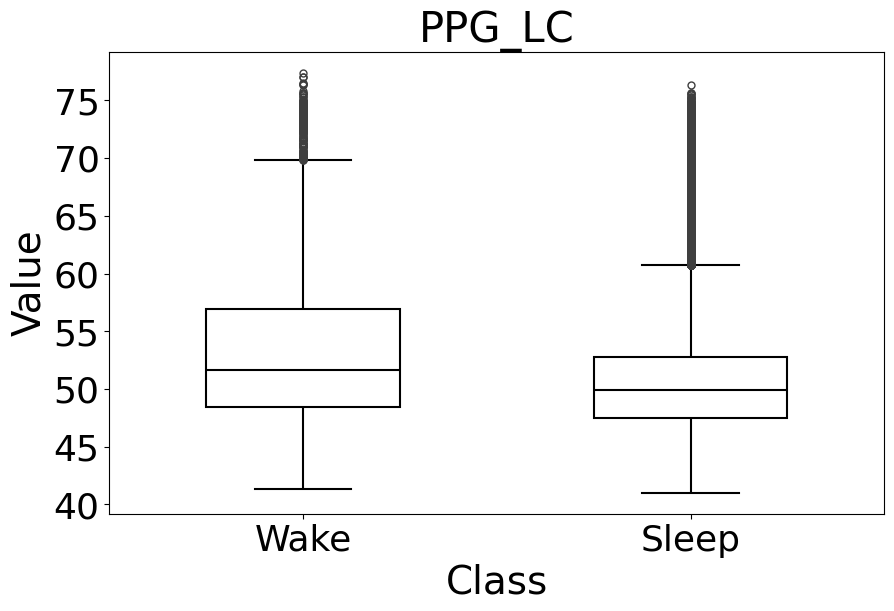

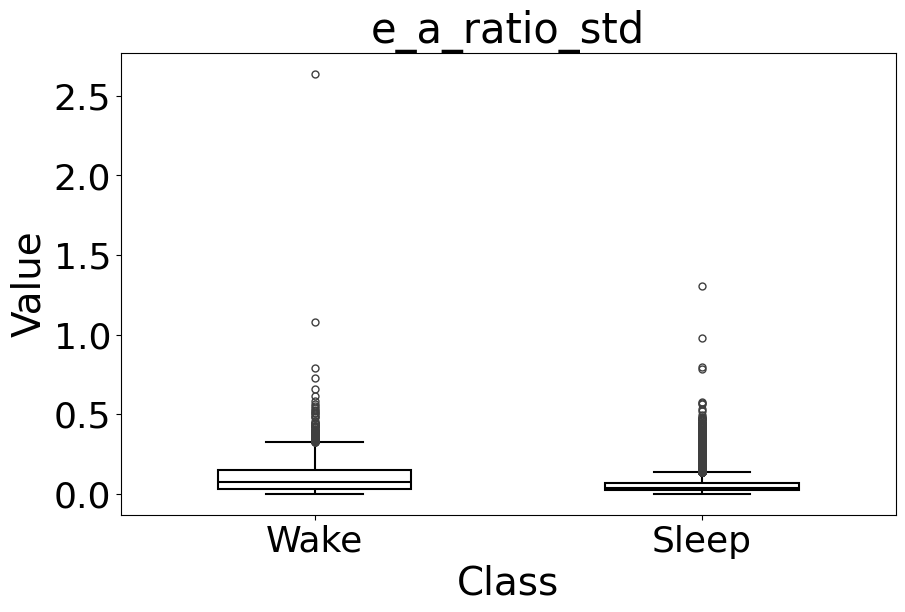

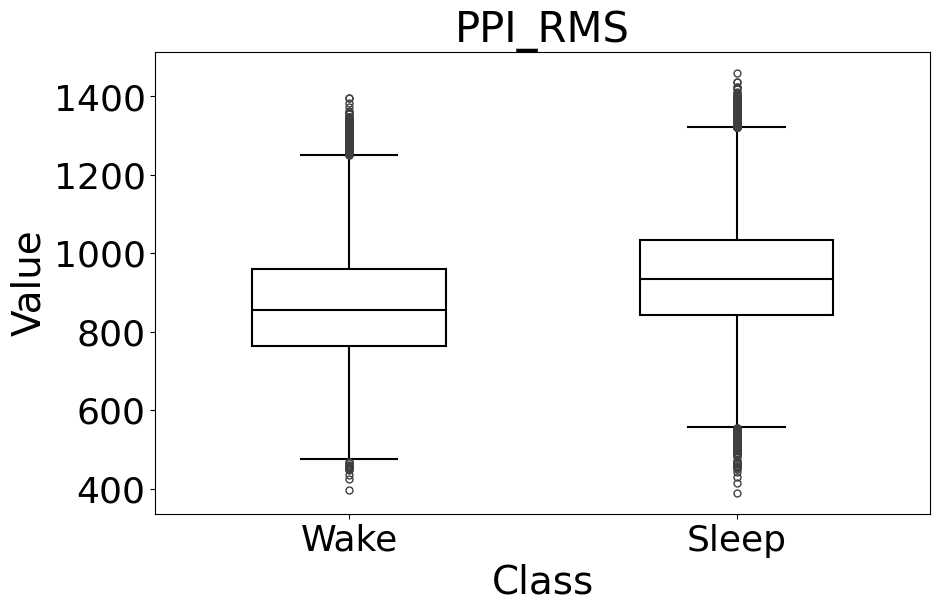

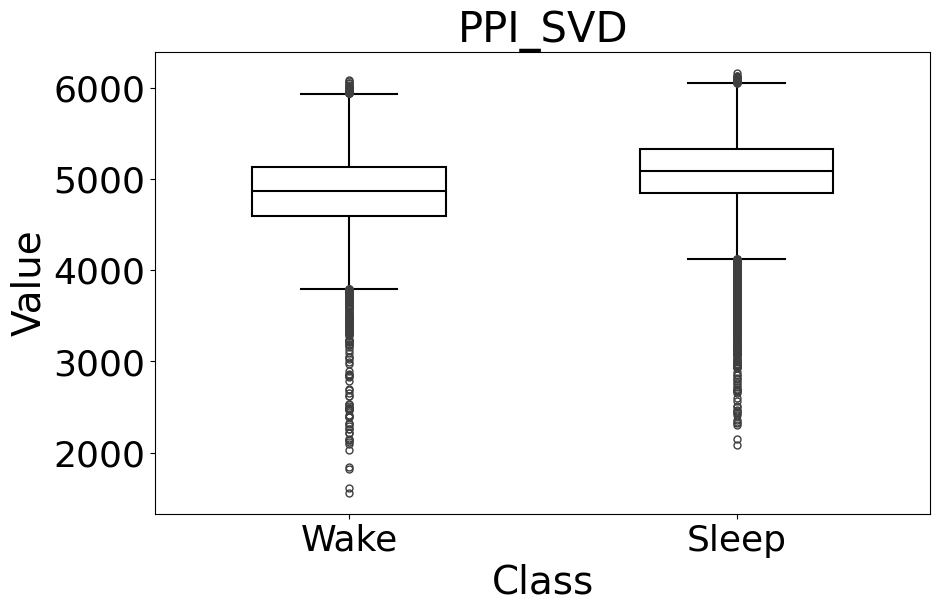

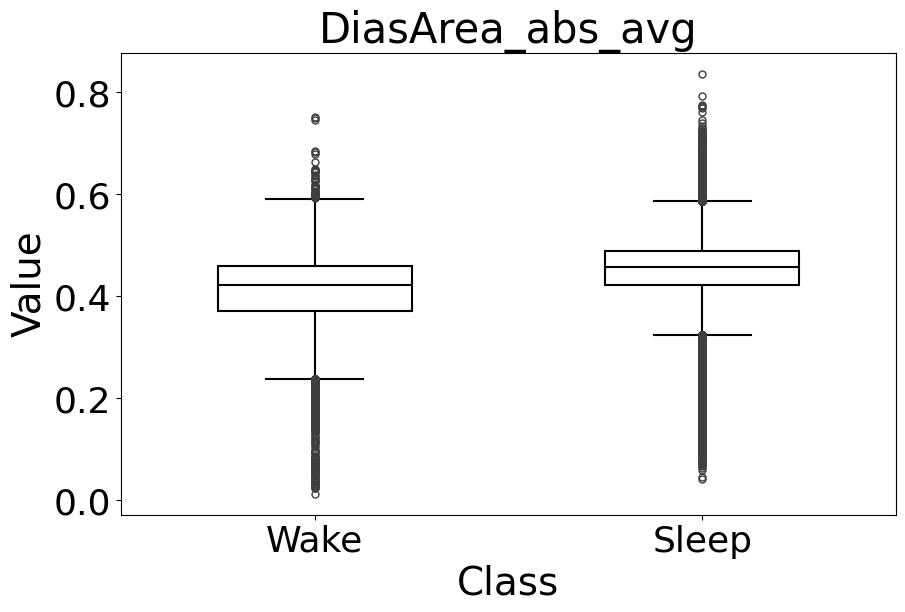

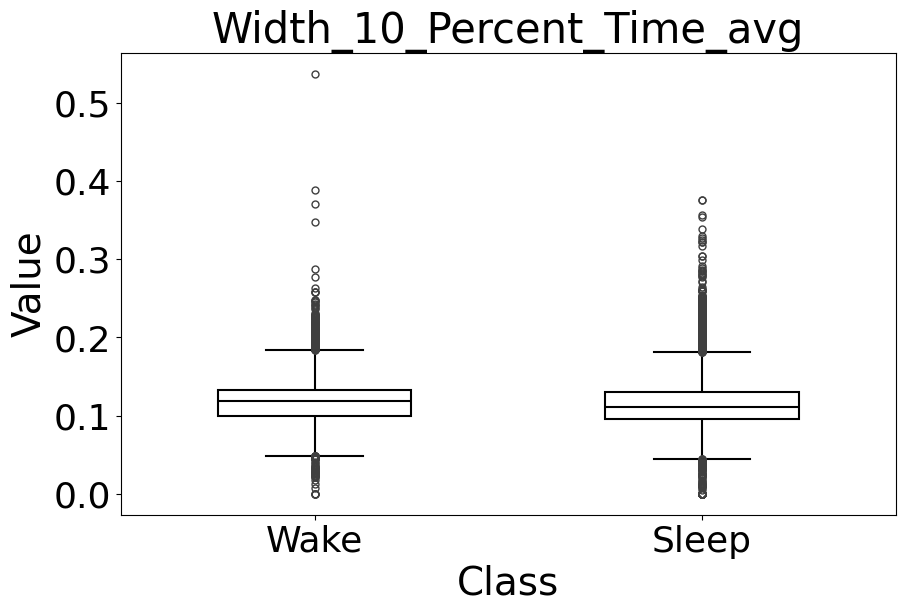

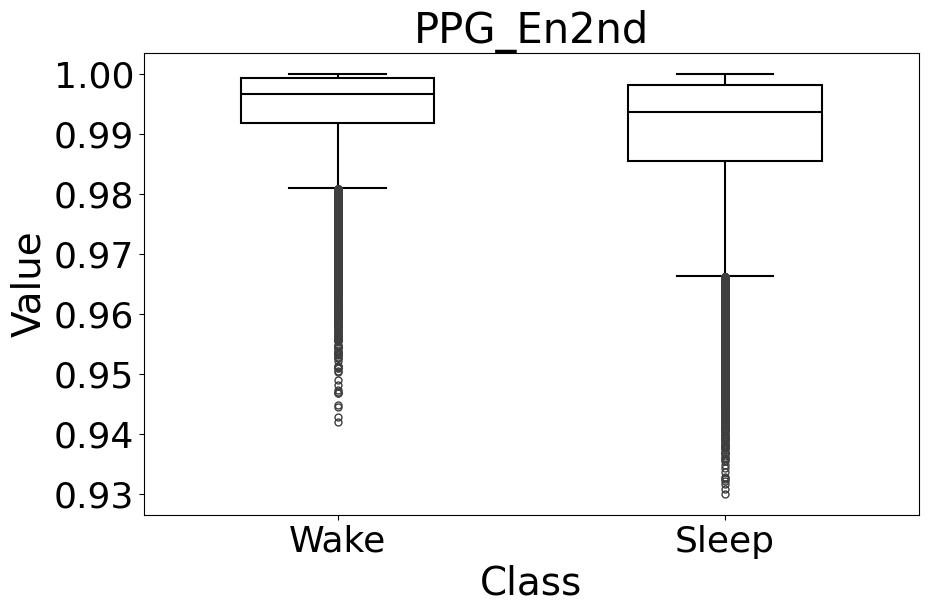

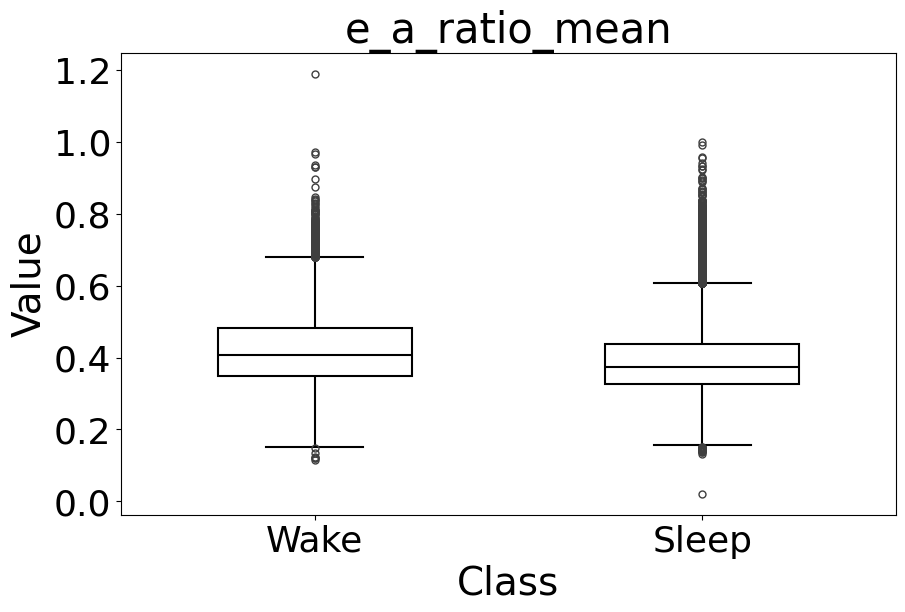

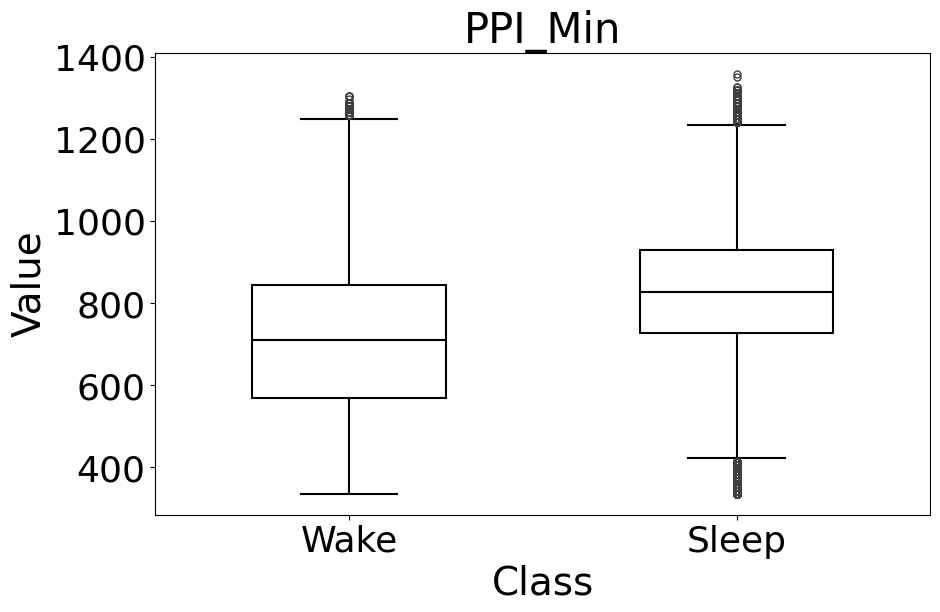

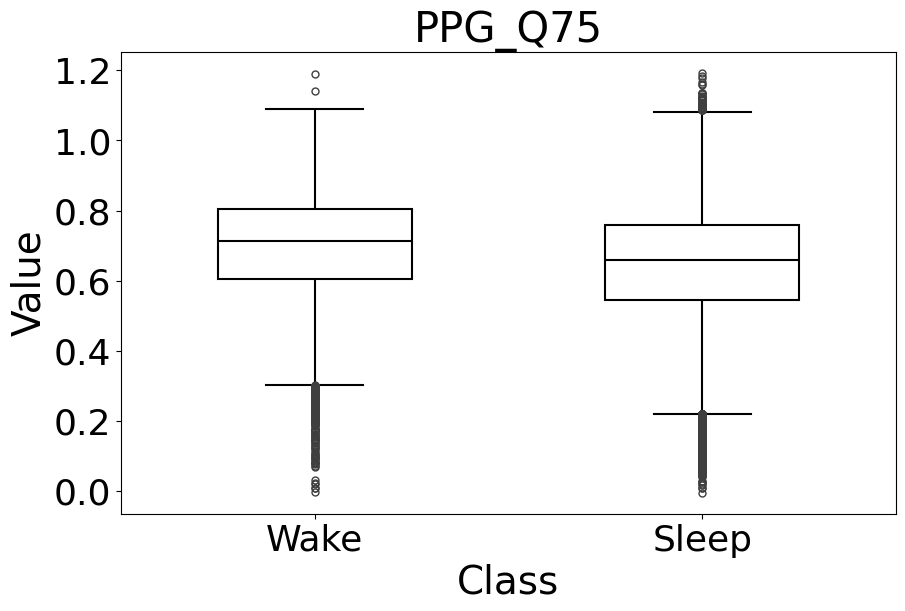

In [26]:
# Plot boxplots for top performing features

class_mapping = {0: "Wake", 1: "Sleep"}  # Make sure to include all original classes
X_selected_top_20['class'] = y
X_selected_top_20['class'] = X_selected_top_20['class'].map(class_mapping)


for feature in feature_names:
    plt.figure(figsize=(10, 6))
    # Create a boxplot with correctly specified properties
    sns.boxplot(x='class', y=feature, data=X_selected_top_20,
                width=0.5,  # Box width
                fliersize=5,  # Outlier marker size
                linewidth=1.5,  # Line width of the boxes
                boxprops={'facecolor': 'white', 'edgecolor': 'black'},  # Box fill and edge color
                whiskerprops={'color': 'black'},  # Whisker color
                capprops={'color': 'black'},  # Caps color
                medianprops={'color': 'black'})  # Median line color

    plt.title(f'{feature}', fontsize=30)
    plt.xlabel('Class', fontsize=28)
    plt.ylabel('Value', fontsize=28)
    plt.xticks(fontsize=26)  # Adjust as needed
    plt.yticks(fontsize=26)

    plt.show()